**KIER YVANNE ABOT**

**BSCS 3A**

#**Import Libraries**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#**1. Data Cleaning and Preparation**

In [37]:
data = pd.read_csv('googleplaystore.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

def convert_size(x):
    if 'M' in x:
        return float(x[:-1]) * 1000000
    elif 'k' in x:
        return float(x[:-1]) * 1000
    else:
        return 0
data['Size'] = data['Size'].apply(convert_size)
data['Installs'] = data['Installs'].apply(lambda x: int(x[:-1].replace(',', '')))
data['Price'] = data['Price'].apply(lambda x: float(x[1:]) if '$' in x else 0)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#**2. Exploratory Data Analysis (EDA)**

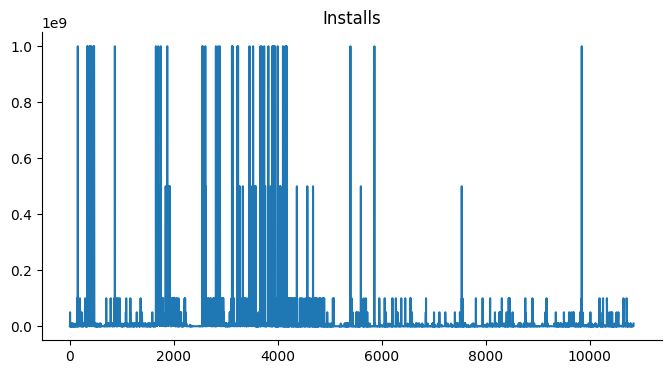

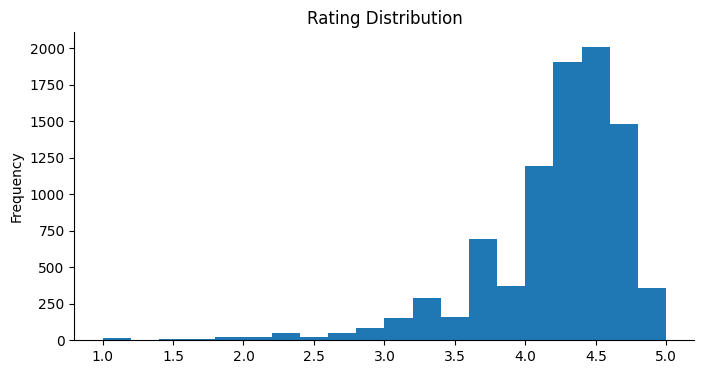

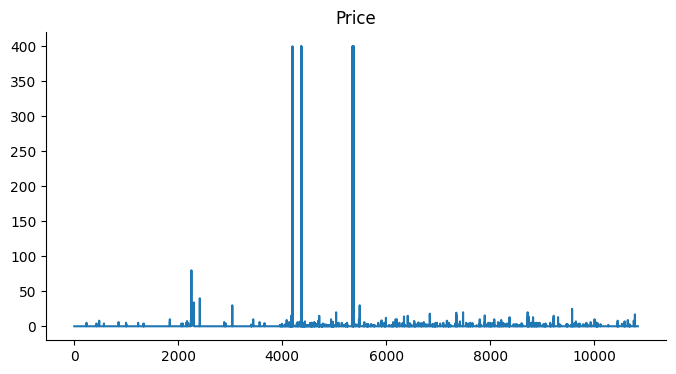

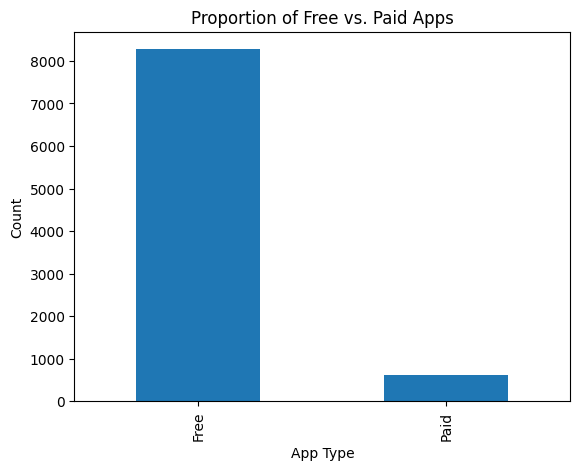

In [38]:
plt.figure(figsize=(8, 4))
data['Installs'].plot(kind='line')
plt.title('Installs')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(8, 4))
data['Rating'].plot(kind='hist', bins=20)
plt.title('Rating Distribution')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(8, 4))
data['Price'].plot(kind='line')
plt.title('Price')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

data['Type'].value_counts().plot(kind='bar')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.title('Proportion of Free vs. Paid Apps')
plt.show()

#**3. Category Analysis**

Category with Highest Average Rating: EVENTS
Category with Most Reviews: GAME
Category with Most Apps: FAMILY


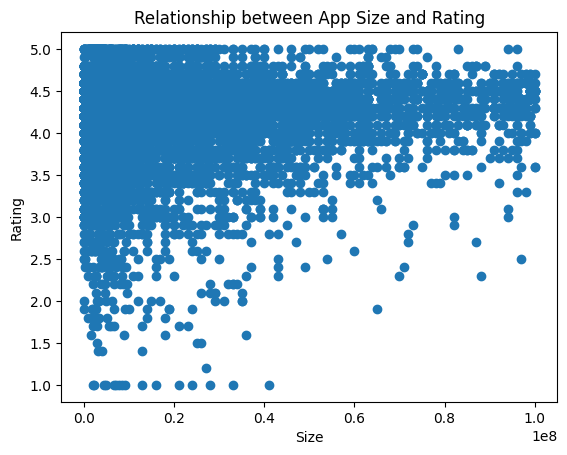

In [39]:
avg_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with Highest Average Rating:", avg_rating_by_category.idxmax())

most_reviews_by_category = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print("Category with Most Reviews:", most_reviews_by_category.idxmax())

most_apps_by_category = data['Category'].value_counts().sort_values(ascending=False)
print("Category with Most Apps:", most_apps_by_category.idxmax())


plt.scatter(data['Size'], data['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Relationship between App Size and Rating')
plt.show()

#**4. Rating Prediction Model**

In [40]:
features = ['Reviews', 'Size', 'Installs', 'Price']
X = data[features]
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.27346864152139044


#**5. Trend Analysis**

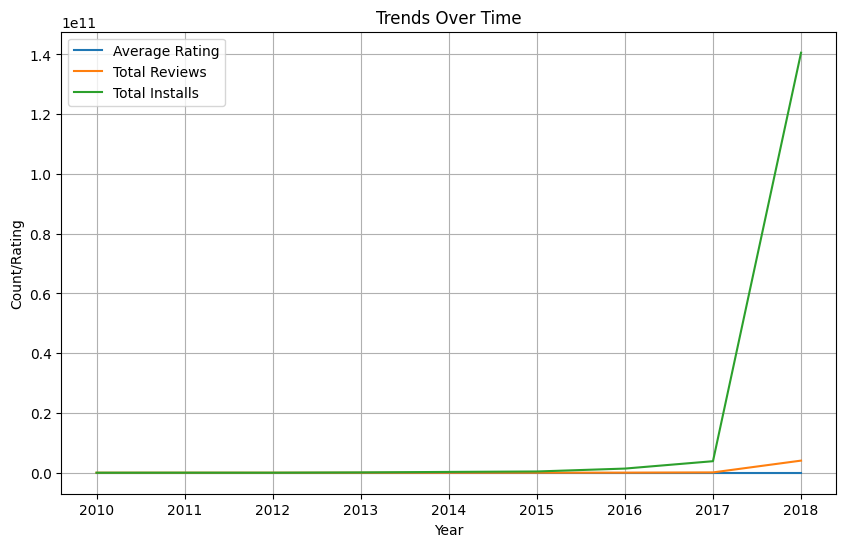

In [41]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Year'] = data['Last Updated'].dt.year
yearly_trends = data.groupby('Year').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Rating'], label='Average Rating')
plt.plot(yearly_trends['Year'], yearly_trends['Reviews'], label='Total Reviews')
plt.plot(yearly_trends['Year'], yearly_trends['Installs'], label='Total Installs')

plt.xlabel('Year')
plt.ylabel('Count/Rating')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

#**6. Impact of Reviews on Ratings**

Correlation between Reviews and Ratings: 0.06872388127364139


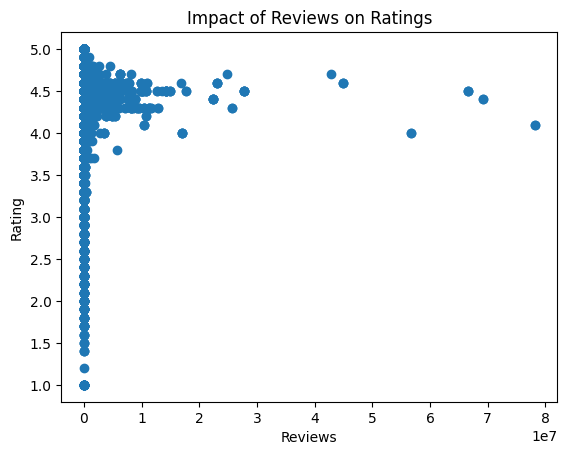

In [42]:
correlation = data['Reviews'].corr(data['Rating'])
print("Correlation between Reviews and Ratings:", correlation)

plt.scatter(data['Reviews'], data['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Impact of Reviews on Ratings')
plt.show()